This notebook is not as well documented. It corresponds to Section 4.4 in Jacob's report, and the study of three neuron motifs.

In [1]:
# imports
%matplotlib inline
from brian2 import *
import dit
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import gen_connections
import simulation
import new_it_analyzer

In [ ]:
#These generate the networks of motifs without the parents. 
#Make sure the directories exist prior to running this.

possible_con_3_neur=[([0],[1]), ([0, 1], [1, 0]), ([0, 1],[1, 2]), ([0, 2], [1, 1]), ([1, 1], [0, 2]), ([0, 1, 1],[1, 0, 2]), ([0, 1, 2], [1, 0, 1]), ([0, 0, 1], [1,2, 2]), ([0, 1, 2], [1, 2, 0]), ([0, 1, 1, 2], [1, 0, 2, 1]), ([0, 1, 1, 2], [1, 0, 2, 0]), ([0, 0, 1, 1], [1, 2, 0, 2]), ([0, 1, 2,2], [1, 0, 0, 1]), ([0, 1, 1, 2, 2], [1, 0, 2, 0, 1]), ([0,0,1,1,2,2], [1,2,0,2,0,1])]

for graph_type in range(len(possible_con_3_neur)):
    print(f'graph type=={graph_type}')
    PATH_TO_DIR = f'observations/motifs/no_parents/'
    #n common parents, no connections:
    synapse_weight=10
    pre_syn=[]
    post_syn=[]
    pre_syn=possible_con_3_neur[graph_type][0]
    post_syn=possible_con_3_neur[graph_type][1]
    ex=simulation.Simulation(3, synapse_weight, 50, pre_syn, post_syn, 'graph_type_{}'.format(graph_type))
    ex.run_and_plot_example_raster(PATH_TO_DIR+'raster/')
    ex.simulate(500, PATH_TO_DIR)

In [24]:
#Motifs with disconnected parents
possible_con_3_neur=[([0],[1]), ([0, 1], [1, 0]), ([0, 1],[1, 2]), ([0, 2], [1, 1]), ([1, 1], [0, 2]), ([0, 1, 1],[1, 0, 2]), ([0, 1, 2], [1, 0, 1]), ([0, 0, 1], [1,2, 2]), ([0, 1, 2], [1, 2, 0]), ([0, 1, 1, 2], [1, 0, 2, 1]), ([0, 1, 1, 2], [1, 0, 2, 0]), ([0, 0, 1, 1], [1, 2, 0, 2]), ([0, 1, 2,2], [1, 0, 0, 1]), ([0, 1, 1, 2, 2], [1, 0, 2, 0, 1]), ([0,0,1,1,2,2], [1,2,0,2,0,1])]

disconnected_xaxis=list(range(1,20))+list(np.arange(20,40,2))+list(np.arange(40, 150, 10))

for graph_type in range(1, len(possible_con_3_neur)):
    print(f'graph type=={graph_type}')
    PATH_TO_DIR = f'observations/motifs/disconnected_parents/'
    for nb_parents in disconnected_xaxis:
        nb_neurons=nb_parents+3
        synapse_weight=10
        pre_syn=possible_con_3_neur[graph_type][0] #children conn
        pos_syn=possible_con_3_neur[graph_type][1]
        
        
        pre_syn+=[i for i in range(3, nb_parents+3)] #first child
        pre_syn+=[i for i in range(3, nb_parents+3)]#second 
        pre_syn+=[i for i in range(3, nb_parents+3)] #third
        
        pos_syn+=[0 for x in range(3, nb_parents+3)]
        pos_syn+=[1 for x in range(3, nb_parents+3)] #second child
        pos_syn+=[2 for x in range(3, nb_parents+3)] #third
        
        ex=simulation.Simulation(nb_neurons, 10, 50, pre_syn, pos_syn, 'type_{}_parents_{}_child_3'.format(graph_type, nb_parents), stim='off')
        ex.simulate(500, PATH_TO_DIR)
        ex.run_and_plot_example_raster(PATH_TO_DIR+'raster/')


graph type==8
graph type==9
graph type==10
graph type==11
graph type==12
graph type==13
graph type==14


In [99]:
#Motifs with simplex parents

possible_con_3_neur=[([0],[1]), ([0, 1], [1, 0]), ([0, 1],[1, 2]), ([0, 2], [1, 1]), ([1, 1], [0, 2]), ([0, 1, 1],[1, 0, 2]), ([0, 1, 2], [1, 0, 1]), ([0, 0, 1], [1,2, 2]), ([0, 1, 2], [1, 2, 0]), ([0, 1, 1, 2], [1, 0, 2, 1]), ([0, 1, 1, 2], [1, 0, 2, 0]), ([0, 0, 1, 1], [1, 2, 0, 2]), ([0, 1, 2,2], [1, 0, 0, 1]), ([0, 1, 1, 2, 2], [1, 0, 2, 0, 1]), ([0,0,1,1,2,2], [1,2,0,2,0,1])]

xaxis=np.arange(1,20, 2)#list(range(1,40,5))+list(np.arange(40, 150, 10))

for graph_type in range(len(possible_con_3_neur)):
    print(f'graph type=={graph_type}')
    #Star shapped directed inwards. For each parent neuron, one synapse is pointing towards the child indexed by 0.
    PATH_TO_DIR = f'observations/motifs/simplex_parents/'
    for nb_parents in xaxis:
        nb_neurons=nb_parents+3
        synapse_weight=10
        pre_syn=possible_con_3_neur[graph_type][0] #children conn
        pos_syn=possible_con_3_neur[graph_type][1]
        
        pre_syn+=[i for i in range(3, nb_parents+3)] #first child
        pre_syn+=[i for i in range(3, nb_parents+3)]#second 
        pre_syn+=[i for i in range(3, nb_parents+3)] #third
        
        pos_syn+=[0 for x in range(3, nb_parents+3)]
        pos_syn+=[1 for x in range(3, nb_parents+3)] #second child
        pos_syn+=[2 for x in range(3, nb_parents+3)] #third
        
        simplex_pre_syn, simplex_pos_syn = gen_connections.simplex(nb_parents) #for parent parent connec
        pre_syn+=[x+3 for x in simplex_pre_syn]
        pos_syn+=[x+3 for x in simplex_pos_syn]
        
        ex=simulation.Simulation(nb_neurons, 10, 50, pre_syn, pos_syn, 'type_{}_parents_{}_child_3'.format(graph_type, nb_parents), stim='off')
        ex.simulate(500, PATH_TO_DIR)
        ex.run_and_plot_example_raster(PATH_TO_DIR+'raster/')


graph type==0
graph type==1
graph type==2
graph type==3
graph type==4
graph type==5
graph type==6
graph type==7
graph type==8
graph type==9
graph type==10
graph type==11
graph type==12
graph type==13
graph type==14


In [25]:
#Motifs with full parents

possible_con_3_neur=[([0],[1]), ([0, 1], [1, 0]), ([0, 1],[1, 2]), ([0, 2], [1, 1]), ([1, 1], [0, 2]), ([0, 1, 1],[1, 0, 2]), ([0, 1, 2], [1, 0, 1]), ([0, 0, 1], [1,2, 2]), ([0, 1, 2], [1, 2, 0]), ([0, 1, 1, 2], [1, 0, 2, 1]), ([0, 1, 1, 2], [1, 0, 2, 0]), ([0, 0, 1, 1], [1, 2, 0, 2]), ([0, 1, 2,2], [1, 0, 0, 1]), ([0, 1, 1, 2, 2], [1, 0, 2, 0, 1]), ([0,0,1,1,2,2], [1,2,0,2,0,1])]

xaxis=list(range(1,40,5))+list(np.arange(40, 150, 10))

for graph_type in range(len(possible_con_3_neur)):
    print(f'graph type=={graph_type}')
    #Star shapped directed inwards. For each parent neuron, one synapse is pointing towards the child indexed by 0.
    PATH_TO_DIR = f'observations/motifs/full_parents/'
    for nb_parents in xaxis:
        nb_neurons=nb_parents+3
        synapse_weight=10
        pre_syn=possible_con_3_neur[graph_type][0] #children conn
        pos_syn=possible_con_3_neur[graph_type][1]
        
        pre_syn+=[i for i in range(3, nb_parents+3)] #first child
        pre_syn+=[i for i in range(3, nb_parents+3)]#second 
        pre_syn+=[i for i in range(3, nb_parents+3)] #third
        
        pos_syn+=[0 for x in range(3, nb_parents+3)]
        pos_syn+=[1 for x in range(3, nb_parents+3)] #second child
        pos_syn+=[2 for x in range(3, nb_parents+3)] #third
        
        full_pre_syn, full_pos_syn = gen_connections.full(nb_parents) #for parent parent connec
        pre_syn+=[x+3 for x in full_pre_syn]
        pos_syn+=[x+3 for x in full_pos_syn]
        
        ex=simulation.Simulation(nb_neurons, 10, 50, pre_syn, pos_syn, 'type_{}_parents_{}_child_3'.format(graph_type, nb_parents), stim='off')
        ex.simulate(500, PATH_TO_DIR)
        ex.run_and_plot_example_raster(PATH_TO_DIR+'raster/')
    full_pre_syn, full_pos_syn = gen_connections.full(nb_parents) #for parent parent connec


graph type==0
graph type==1
graph type==2
graph type==3
graph type==4
graph type==5
graph type==6
graph type==7
graph type==8
graph type==9
graph type==10
graph type==11
graph type==12
graph type==13
graph type==14


In [ ]:
#Motifs with torus parents


possible_con_3_neur=[([0],[1]), ([0, 1], [1, 0]), ([0, 1],[1, 2]), ([0, 2], [1, 1]), ([1, 1], [0, 2]), ([0, 1, 1],[1, 0, 2]), ([0, 1, 2], [1, 0, 1]), ([0, 0, 1], [1,2, 2]), ([0, 1, 2], [1, 2, 0]), ([0, 1, 1, 2], [1, 0, 2, 1]), ([0, 1, 1, 2], [1, 0, 2, 0]), ([0, 0, 1, 1], [1, 2, 0, 2]), ([0, 1, 2,2], [1, 0, 0, 1]), ([0, 1, 1, 2, 2], [1, 0, 2, 0, 1]), ([0,0,1,1,2,2], [1,2,0,2,0,1])]


for graph_type in range(len(possible_con_3_neur)):
    print(f'graph type=={graph_type}')
    #Star shapped directed inwards. For each parent neuron, one synapse is pointing towards the child indexed by 0.
    PATH_TO_DIR = f'observations/motifs/torus_parents/'
    for nb_parents in range(1,20):
        nb_neurons=nb_parents*nb_parents+3
        synapse_weight=10
        pre_syn=possible_con_3_neur[graph_type][0] #children conn
        pos_syn=possible_con_3_neur[graph_type][1]
        
        pre_syn+=[i for i in range(3, nb_parents*nb_parents+3)] #first child
        pre_syn+=[i for i in range(3, nb_parents*nb_parents+3)]#second 
        pre_syn+=[i for i in range(3, nb_parents*nb_parents+3)] #third
        
        pos_syn+=[0 for x in range(3, nb_parents*nb_parents+3)]
        pos_syn+=[1 for x in range(3, nb_parents*nb_parents+3)] #second child
        pos_syn+=[2 for x in range(3, nb_parents*nb_parents+3)] #third
        
        tori_pre_syn, tori_pos_syn = gen_connections.torus(nb_parents, nb_parents) #for parent parent connec
        pre_syn+=[x+3 for x in tori_pre_syn]
        pos_syn+=[x+3 for x in tori_pos_syn]
        
        ex=simulation.Simulation(nb_neurons, 10, 50, pre_syn, pos_syn, 'type_{}_parents_{}_child_3'.format(graph_type, nb_parents), stim='off')
        ex.simulate(500, PATH_TO_DIR)
        ex.run_and_plot_example_raster(PATH_TO_DIR+'raster/')
    full_pre_syn, full_pos_syn = gen_connections.full(nb_parents) #for parent parent connec


Now we analyze:

In [27]:
#This gives the information simplex, in dictionary form. 
#This was used to generate Figure 15

PATH_TO_DIR='observations/motifs/no_parents/'
#PATH_TO_DIR='observations/motifs/disconnected_parents/'


power_list=[[0,1,2], [0,1], [0,2], [1,2], [0], [1], [2]]
#type_vect
#for graph_type in range(16):
graph_type=14
nb_par = 11
location=PATH_TO_DIR+'graph_type_{}_nb_neur_3_sw_10_tbs_50_stim_off'.format(graph_type)
#location=PATH_TO_DIR+'type_{}_parents_{}_child_3_nb_neur_{}_sw_10_tbs_50_stim_off'.format(graph_type, nb_par, nb_par+3)
analyz=new_it_analyzer.IT_analyzer(location)
full_three_neuron_analysis(analyz)


{(0, 1, 2): 3.866,
 (0, 1): 2.636,
 (0, 2): 2.641,
 (1, 2): 2.633,
 (0,): 1.358,
 (1,): 1.351,
 (2,): 1.349,
 'co_information': 0.015,
 'total_correlation': 0.193,
 'dual_total_correlation': 0.178,
 'I([0, 1];[2])': 0.12,
 'I([0, 2];[1])': 0.126,
 'I([1, 2];[0])': 0.125,
 'I([0];[1])': 0.073,
 'I([0];[2])': 0.067,
 'I([1];[2])': 0.068}

In [3]:
def full_three_neuron_analysis(analyz):
    power_list=[[0,1,2], [0,1], [0,2], [1,2], [0], [1], [2]]
    dico={}
    for lis in power_list:
        dico[tuple(lis)]=round(np.mean([dit.shannon.entropy(d, lis, rv_mode='indices') for d in analyz.dists]), 3)

    dico['co_information'] = round(np.mean([dit.multivariate.coinformation(d, [[0], [1], [2]], rv_mode='indices') for d in analyz.dists]), 3)
    dico['total_correlation'] = round(np.mean([dit.multivariate.total_correlation(d, [[0], [1], [2]], rv_mode='indices') for d in analyz.dists]), 3)
    dico['dual_total_correlation']=round(np.mean([dit.multivariate.dual_total_correlation(d, [[0], [1], [2]], rv_mode='indices') for d in analyz.dists]), 3)
    for x in range(len(power_list)):
        for y in range(x+1, len(power_list)):
            #if (not (power_list[x] in power_list[y])) and (not (power_list[y] in power_list[x])):
            if not set(power_list[x]).intersection(power_list[y]):
                dico['I({};{})'.format(power_list[x], power_list[y])] = round(np.mean([dit.shannon.mutual_information(d, power_list[x], power_list[y], rv_mode='indices') for d in analyz.dists]), 3)
    
    return dico
    

The following were not in the report, but the goal was to look at multivariate information measures.

In [10]:
def plot_evolution(parent_type, graph_type, xaxis):
    PATH_TO_DIR='observations/motifs/'+parent_type+'/'
    analyzs=[new_it_analyzer.IT_analyzer(PATH_TO_DIR+'type_{}_parents_{}_child_3_nb_neur_{}_sw_10_tbs_50_stim_off'.format(graph_type, i, i+3)) for i in xaxis]
    joint_entropies=[np.mean([dit.shannon.entropy(d, [0, 1, 2], rv_mode='indices') for d in analyz.dists]) for analyz in analyzs]

    #Mutual Information
    co_information=[np.mean([dit.multivariate.coinformation(d, [[0], [1], [2]], rv_mode='indices') for d in analyz.dists]) for analyz in analyzs] #dit.multivariate.coinformation(d, 'XYZ')
    
    total_correlation=[np.mean([dit.multivariate.total_correlation(d, [[0], [1], [2]], rv_mode='indices') for d in analyz.dists]) for analyz in analyzs] #dit.multivariate.coinformation(d, 'XYZ')
    print('total_correlation done 2/6')

    dual_total_correlation=[np.mean([dit.multivariate.dual_total_correlation(d, [[0], [1], [2]], rv_mode='indices') for d in analyz.dists]) for analyz in analyzs] #dit.multivariate.coinformation(d, 'XYZ')
    print('dual total_correlation done 3/6')

    #caekl_mutual_information=[np.mean([dit.multivariate.caekl_mutual_information(d, [[0], [1], [2]], rv_mode='indices') for d in analyzs[i].dists]) for i in range(len(analyzs))] #dit.multivariate.coinformation(d, 'XYZ')
    #print('caekl_mutual_information done')

    interaction_information=[np.mean([dit.multivariate.interaction_information(d, [[0], [1], [2]], rv_mode='indices') for d in analyz.dists]) for analyz in analyzs] #dit.multivariate.coinformation(d, 'XYZ')
    print('interaction_information done')
    
    plt.title('Cond multi Information measures by nb of common parents')
    
    plt.plot(xaxis, joint_entropies, 'C4d-', label = 'joint_entropies')

    plt.plot(xaxis, co_information, 'gs-', label = 'co_information')
    plt.plot(xaxis, total_correlation, 'bo-', label = 'total_correlation')
    plt.plot(xaxis, dual_total_correlation, 'ro-', label = 'dual_total_correlation')
    plt.plot(xaxis, interaction_information, 'ys-', label = 'interaction_information' )
    
    
    #plt.xticks(np.arange(0,chain_length, 1))
    plt.ylabel('Multi entropy')
    plt.xlabel('Nb of common parents')
    #plt.ylim([0,1.5*m])
    plt.legend()

    


total_correlation done 2/6
dual total_correlation done 3/6
interaction_information done


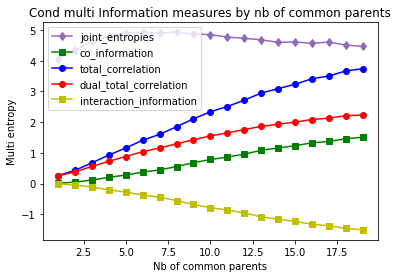

In [22]:
xaxis=list(np.arange(1,20))#+list(np.arange(20,40,2))#+list(np.arange(40, 150, 10))

plot_evolution('disconnected_parents', 14, xaxis)

total_correlation done 2/6
dual total_correlation done 3/6
interaction_information done


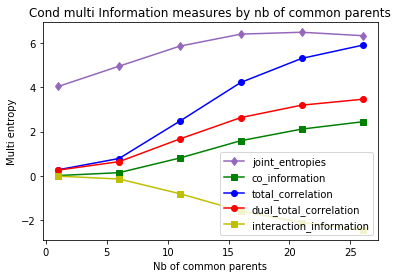

In [23]:
xaxis=list(np.arange(1,27, 5))#+list(np.arange(20,40,2))#+list(np.arange(40, 150, 10))

plot_evolution('simplex_parents', 14, xaxis)

In [82]:

def generate_children_mut_inf(connection_type, xaxis, graph_type = None, children_connection_type=None):
    if children_connection_type is None:
        PATH_TO_DIR = 'observations/motifs/'+connection_type+'/'
    else:
        PATH_TO_DIR = 'observations/motifs/'+connection_type+'/'
    analyzs=[new_it_analyzer.IT_analyzer(PATH_TO_DIR+'type_{}_parents_{}_child_3_nb_neur_{}_sw_10_tbs_50_stim_off'.format(graph_type, i, i+3)) for i in xaxis]
    children_mutual_inf=[np.mean([dit.shannon.mutual_information(d, [0], [1], rv_mode='indices') for d in analyz.dists]) for analyz in analyzs]
    return children_mutual_inf

#same but conditioned on parents
def generate_children_cond_mut_inf(connection_type, xaxis, children_connection_type=None):
    if children_connection_type is None:
        PATH_TO_DIR = 'observations/mutual_information_and_common_parents/'+connection_type+'/'
    else:
        PATH_TO_DIR = 'observations/mutual_information_and_common_parents/'+connection_type+'_'+children_connection_type+'/'

    analyzs=[new_it_analyzer.IT_analyzer(PATH_TO_DIR+'parents_{}_child_2_nb_neur_{}_sw_10_tbs_50_stim_off'.format(i, i+2)) for i in xaxis]
    children_mutual_inf=[np.mean([dit.shannon.conditional_entropy(d, [0], range(2,analyz.nb_neurons), rv_mode='indices')-dit.shannon.conditional_entropy(d, [0], range(1, analyz.nb_neurons), rv_mode='indices') for d in analyz.dists]) for analyz in analyzs]
    return children_mutual_inf

def generate_child_entropy_siblings(connection_type, xaxis, children_connection_type=None):
    if children_connection_type is None:
        PATH_TO_DIR = 'observations/mutual_information_and_common_parents/'+connection_type+'/'
    else: 
        PATH_TO_DIR = 'observations/mutual_information_and_common_parents/'+connection_type+'_'+children_connection_type+'/'

    analyzs=[new_it_analyzer.IT_analyzer(PATH_TO_DIR+'parents_{}_child_2_nb_neur_{}_sw_10_tbs_50_stim_off'.format(i, i+2)) for i in xaxis]
    child_entropy=[np.mean([dit.shannon.entropy(d, [0], rv_mode='indices') for d in analyz.dists]) for analyz in analyzs]
    return child_entropy



